In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")

red['type'] = 1
white['type'] = 0

wines = pd.concat([red, white])
wines.dropna(inplace=True)

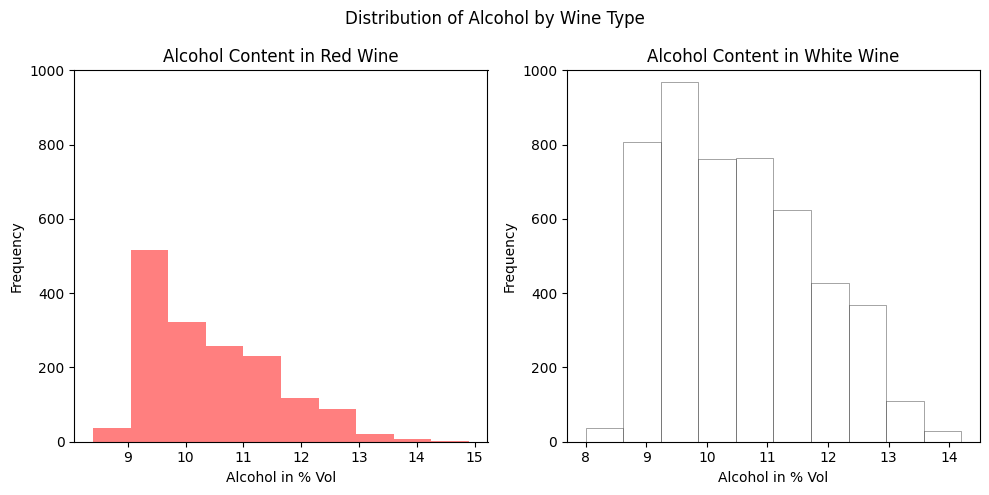

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(wines[wines['type'] == 1].alcohol, bins=10, facecolor='red', alpha=0.5, label='Red wine')
ax[1].hist(wines[wines['type'] == 0].alcohol, bins=10, facecolor='white', edgecolor='black', lw=0.5, alpha=0.5, label='White wine')

for a in ax:
    a.set_ylim([0, 1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol by Wine Type')
plt.tight_layout()
plt.show()

In [8]:
X = wines.iloc[:, :-1]
Y = wines['type']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=45)

In [9]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/ameliali/GitHub/machine-learning-projects/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.fit(X_train, Y_train, epochs=3, batch_size=1, verbose=1)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step - accuracy: 0.9081 - loss: 0.2592
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step - accuracy: 0.9300 - loss: 0.2024
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.9401 - loss: 0.1742


In [11]:
y_pred = model.predict(X_test)

y_pred_labels = (y_pred > 0.5).astype(int)

for prediction in y_pred_labels[:12]:
    wine_type = 'Red Wine' if prediction == 1 else 'White Wine'
    print(f"Prediction: {wine_type}" )

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
Prediction: White Wine
Prediction: White Wine
Prediction: White Wine
Prediction: White Wine
Prediction: White Wine
Prediction: Red Wine
Prediction: Red Wine
Prediction: White Wine
Prediction: Red Wine
Prediction: White Wine
Prediction: White Wine
Prediction: Red Wine
